In [2]:
from keras.datasets import mnist
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [20]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
def showMatriz(matriz):
    print(matriz.shape)
    sns.heatmap(matriz, cmap="YlGnBu")
    plt.show()

example imagen
(28, 28)


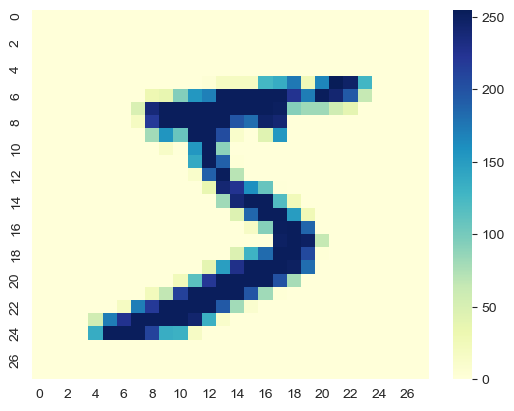

In [5]:
print("example imagen")
showMatriz(train_images[0])

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
from keras.utils import to_categorical

print(train_labels.shape)
print(train_labels[0])
train_labels_new = to_categorical(train_labels)
test_labels_new = to_categorical(test_labels)

(60000,)
5


In [8]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [9]:
print("training")
network.fit(train_images, train_labels_new, epochs=10, batch_size=128)

training
Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.2671 - accuracy: 0.9239
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1086 - accuracy: 0.9679
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0707 - accuracy: 0.9789
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0508 - accuracy: 0.9853
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0379 - accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0286 - accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0215 - accuracy: 0.9941
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0170 - accuracy: 0.9951
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0119 - accuracy: 0.9970
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0093

In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels_new)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.9815
test_acc: 0.9815000295639038
test_loss: 0.06312678009271622


1/1 [==============================] - 0s 49ms/step
[[6.3973181e-11 2.8518819e-08 1.0000000e+00 1.8079255e-08 6.9823467e-17
  1.4090655e-10 9.6916867e-12 1.5375613e-17 6.3457373e-09 5.8286778e-16]]
(10, 1)


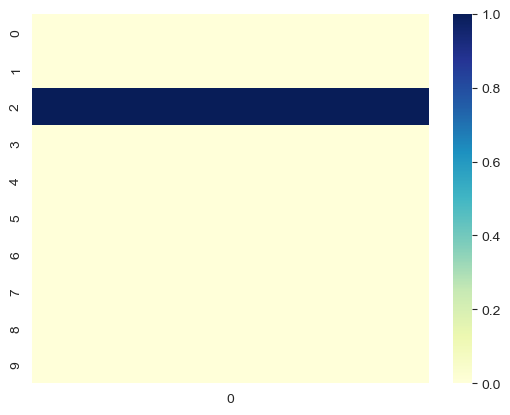

(28, 28)


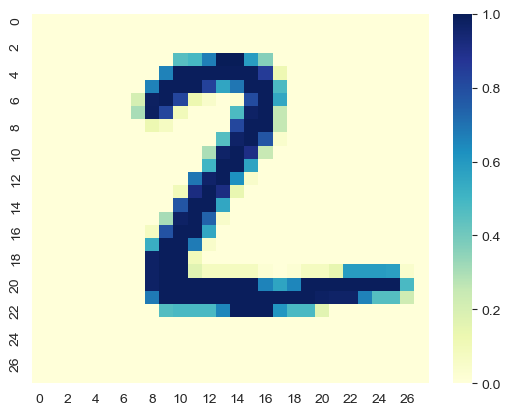

In [16]:
pre = network.predict(test_images[1:2])
print(pre)
showMatriz(pre.reshape(10,1))
showMatriz(test_images[1].reshape(28,28))